# **Universidad Central**

![UC](https://www.ucentral.edu.co/themes/ucentral/img/template/Universidad%20Central.png)

# **Maestría en Analítica de Datos**
## *Fundamentos De Estadística Para La Analítica de Datos*
## **Profesor**: Nelson Alirio Cruz Gutierrez Ph.D.
## **Estudiantes**:
## -- Cristian Camilo Guevara Serrano
## -- Jennifer Alexandra Rodríguez Crespo 
## -- Stiven Leonardo Silva Castillo


## **Tarea para el 20 de abril**

Calcular el $R^2$, el **MAPE**, el **MSE** y el **RMSE** e interpretarlos.

## **Desarrollo**

Inicialmente se importan las librerias que se van a utilizar en el desarrollo del ejercicio

In [3]:
import pandas as pd
import numpy as np                                              
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_error, max_error, mean_absolute_percentage_error # para sacar las metricas                                    
from sklearn import linear_model                     # para modelo lineal
from sklearn.model_selection import train_test_split # para dividir la base en train y test 

Ahora se importan los datos con los cuales se va a trabajar

In [4]:
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Violencia.csv"
violencia=pd.read_csv(url, sep=";", decimal=",", na_values="?",index_col=0)
violencia

,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
communityname,,,,,,,,,,,,,,,,,,,,,
BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,1.88,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,0.85,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,2.35,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,0.70,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,0.52,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mercedcity,CA,NaN,NaN,10,56216,3.07,6.87,61.68,15.23,29.86,...,1376.0,2268.72,2563.0,4225.82,489.0,806.25,34.0,56.06,545.75,7356.84
Pinevillecity,LA,NaN,NaN,10,12251,2.68,21.18,76.65,1.52,1.29,...,104.0,860.43,574.0,4748.90,24.0,198.56,2.0,16.55,124.10,5824.44
Yucaipacity,CA,NaN,NaN,10,32824,2.46,0.52,92.62,0.98,11.00,...,628.0,1709.26,895.0,2435.97,179.0,487.19,8.0,21.77,353.83,4654.20


Se crea un nuevo `DataFrame` aplicando un filtro en la columna `'murdPerPop'` para que extraiga unicamente lo que sea mayor a $0$

In [5]:
base_asesinatos = violencia[violencia["murdPerPop"]>0]

Se crea una nueva columna calculando el logaritmo de la columna `"murdPerPop"` que es la variable objetivo y se seleccionan unicamente las $3$ columnas que se necesitan para el ejercicio, en esete caso `'murdPerPop'`, `'log_murdPerPop'` y `'MedIncome'`



In [7]:
base_asesinatos = base_asesinatos[["murdPerPop",'medIncome']]
base_asesinatos_sinNA = base_asesinatos.dropna()
base_asesinatos_sinNA

,murdPerPop,medIncome
communityname,,
Tigardcity,8.30,35669
Springfieldcity,4.63,21577
Andersoncity,13.13,23221
Wacocity,26.88,17852
Shermancity,3.11,24763
...,...,...
Lawndalecity,6.88,34552
Weatherfordcity,5.48,25208
Mercedcity,16.49,24727


Se almacena en $Y$ la variable dependente y en $X$ la variable independiente, en este caso vamos a trabajar con un modelo de regresión lineal simple donde vamos a tener una sola variable explicativa `'medIncome'`

In [8]:
X = base_asesinatos_sinNA[["medIncome"]]
Y = base_asesinatos_sinNA["murdPerPop"]

El siguiente paso es crear el modelo de regresión lineal, con la variable original y con la variable en logaritmo

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    train_size=0.8, 
                                                    random_state=20)

RegresionLineal= linear_model.LinearRegression().fit(X_train, Y_train)

RegresionLineal_log = linear_model.LinearRegression().fit(X_train, np.log(Y_train))

Se crea un nuevo DataFrame `'Y_pron'` donde se va a utilizar la función `predict` para calcular las predicciones de la variable original y el pronostico de la variable con logaritmo para comparar cuales de los dos modelos es mas preciso

In [11]:
Y_pron = pd.DataFrame((RegresionLineal.predict(X_test)), 
                      index=Y_test.index, 
                      columns=["Pronostico"])

Y_pron["Reales"] = Y_test
Y_pron["Pronostico_log"]=np.exp(RegresionLineal_log.predict(X_test))
Y_pron

,Pronostico,Reales,Pronostico_log
communityname,,,
Appletoncity,10.141900,2.85,7.244841
Mantecacity,9.292160,2.25,6.656900
Riversidecity,9.380649,13.59,6.715831
Rosenbergcity,12.213531,4.56,8.905135
Summervilletown,10.432781,4.43,7.457812
...,...,...,...
Norcocity,4.111199,4.04,3.973392
Schaumburgvillage,5.543644,1.40,4.582728
Joplincity,14.207029,11.56,10.861065


# **Acerca de las métricas**

## **Error Absoluto Medio (MAE)**

Es una puntuación lineal, lo que significa que todas las diferencias individuales se ponderan por igual en el promedio. Por ejemplo, la diferencia entre $10$ y $0$ será el doble de la diferencia entre $5$ y $0$.

Lo importante de esta métrica es que penaliza errores enormes que no tan mal como lo hace **MSE**. Por lo tanto, no es tan sensible a los valores atípicos como el error cuadrático medio.

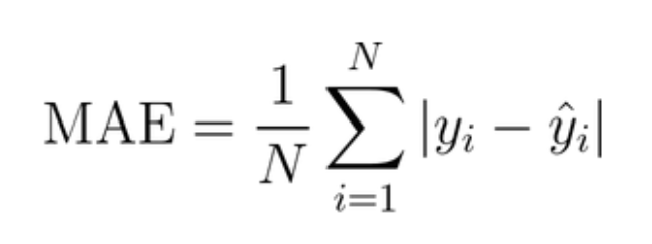

In [12]:
# Calculo utilizando la libreria
MAE = mean_absolute_error(Y_pron["Reales"], Y_pron["Pronostico"])
print("El error absoluto medio MAE es:", MAE)

El error absoluto medio MAE es: 6.247858103573322


In [13]:
# Calculo manual
MAE2 = sum(np.abs(Y_pron["Reales"]-Y_pron["Pronostico"]))/Y_pron.shape[0]
print("El error absoluto medio MAE es:", MAE2)

El error absoluto medio MAE es: 6.247858103573318


Esto nos indica en promedio, las predicciones del modelo real se desvían en $6.25$ unidades de la variable de respuesta en comparación con los valores reales. 


In [17]:
# Calculo utilizando la libreria
MAE_Log = mean_absolute_error(Y_pron["Reales"], Y_pron["Pronostico_log"])
print("El error absoluto medio MAE para la variable con logaritmo es:\n",MAE_Log)

El error absoluto medio MAE para la variable con logaritmo es:
 6.027194227773392


In [18]:
# Calculo manual
MAE_Log2 = sum(np.abs(Y_pron["Reales"]-Y_pron["Pronostico_log"]))/Y_pron.shape[0]
print("El error absoluto medio MAE para la variable con logaritmo es:\n", MAE_Log2)

El error absoluto medio MAE para la variable con logaritmo es:
 6.027194227773387


Esto nos indica en promedio, las predicciones del modelo logarítmico se desvían en $6.02$ unidades de la variable de respuesta en comparación con los valores reales. 

## **Error Porcentual Absoluto Medio (MAPE)**

Es un indicador que mide el tamaño del error (absoluto) en términos porcentuales. El hecho que se estime una magnitud del error porcentual lo hace un indicador frecuentemente utilizado por los encargados de elaborar pronósticos debido a su fácil interpretación.

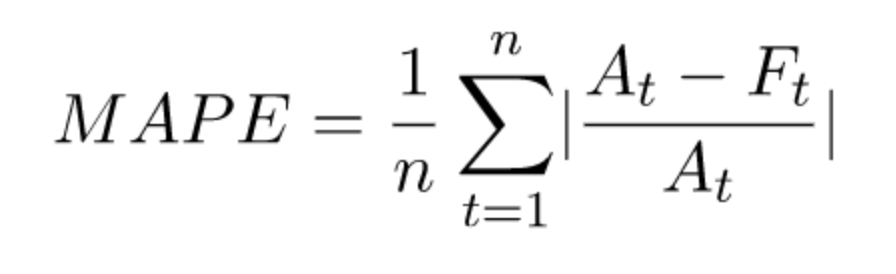

In [19]:
# Calculo utilizando la libreria
MAPE = mean_absolute_percentage_error(Y_pron["Reales"], Y_pron["Pronostico"])
print("El error absoluto medio MAPE es:", MAPE)

El error absoluto medio MAPE es: 0.9594046381361832


In [20]:
# Calculo manual
MAPE2 = sum(np.abs((Y_pron["Reales"] - Y_pron["Pronostico"])/Y_pron["Reales"]))/Y_pron.shape[0]
print("El error absoluto medio MAPE es:", MAPE2)

El error absoluto medio MAPE es: 0.9594046381361836


Un **MAPE** de $0.96$ significa que, en promedio, las predicciones del modelo se desvían en un $96$% en términos porcentuales de los valores reales de entrenamiento.

In [21]:
# Calculo utilizando la libreria
MAPE_Log = mean_absolute_percentage_error(Y_pron["Reales"], Y_pron["Pronostico_log"])
print("El error absoluto medio MAPE para la variable con logaritmo es:\n", MAPE_Log)

El error absoluto medio MAPE para la variable con logaritmo es:
 0.6982373460798262


In [22]:
# Calculo manual
MAPE_Log2 = sum(np.abs((Y_pron["Reales"] - Y_pron["Pronostico_log"])/Y_pron["Reales"]))/Y_pron.shape[0]
print("El error absoluto medio MAPE para la variable con logaritmo es:\n", MAPE_Log2)

El error absoluto medio MAPE para la variable con logaritmo es:
 0.6982373460798267


Un **MAPE** de $0.70$ significa que, en promedio, las predicciones del modelo se desvían en un $70$% en términos porcentuales de los valores logarítmicos.

## **Error Cuadrático Medio (MSE)**

Mide el error cuadrado promedio de las predicciones, cuanto mayor sea este valor, peor es el modelo

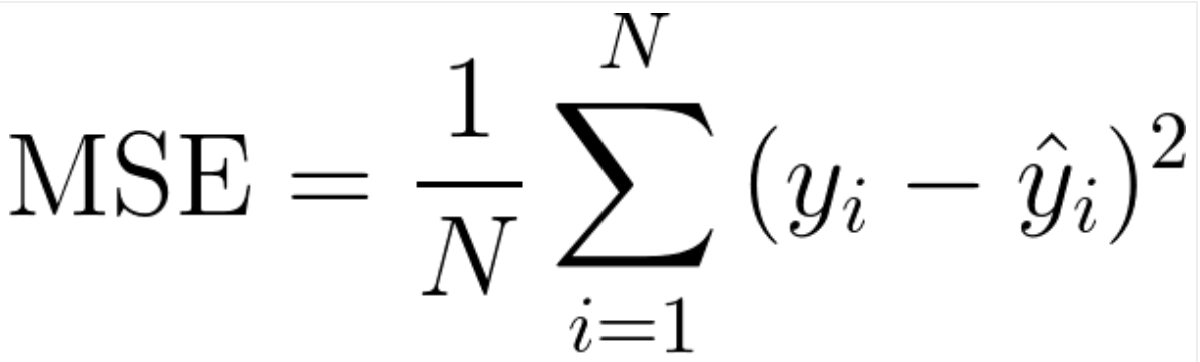

In [23]:
# Calculo utilizando la libreria
MSE = mean_squared_error(Y_pron["Reales"], Y_pron["Pronostico"])
print("El error cuadrático medio MSE es:", MSE)

El error cuadrático medio MSE es: 88.17394734232066


In [24]:
# Calculo manual
MSE2 = sum((Y_pron["Reales"] - Y_pron["Pronostico"])**2)/Y_pron.shape[0]
print("El error cuadrático medio MSE es:", MSE2)

El error cuadrático medio MSE es: 88.17394734232067


Un **MSE** de $88.17$ significa que, en promedio, las predicciones del modelo se desvían en $88.17$ unidades al cuadrado de la variable de respuesta en comparación con los valores reales de entrenamiento.

In [ ]:
# Calculo utilizando la libreria
MSE_Log = mean_squared_error(Y_pron["Reales"], Y_pron["Pronostico_log"])
print("El error cuadrático medio MSE para la variable con logaritmo es:", MSE_Log)

El error cuadrático medio MSE para la variable con logaritmo es: 99.6241042396282


In [25]:
# Calculo manual
MSE_Log2 = sum((Y_pron["Reales"] - Y_pron["Pronostico_log"])**2)/Y_pron.shape[0]
print("El error cuadrático medio MSE para la variable con logaritmo es:\n", MSE_Log2)

El error cuadrático medio MSE para la variable con logaritmo es:
 99.62410423962817


Un **MSE** de $99.62$ significa que, en promedio, las predicciones del modelo se desvían en $99.62$ unidades al cuadrado de la variable de respuesta en comparación con los valores logarítmicos.

##**Raíz Cuadrada del Error Cuadrático Medio (RMSE)**

Es solo la raíz cuadrada de **MSE**, la raíz cuadrada se introduce para hacer que la escala de los errores sea igual a la escala de los objetivos. Si la métrica objetivo es **RMSE**, aún podemos comparar nuestros modelos utilizando **MSE**, ya que **MSE** ordena el modelo de la misma manera que **RMSE**.

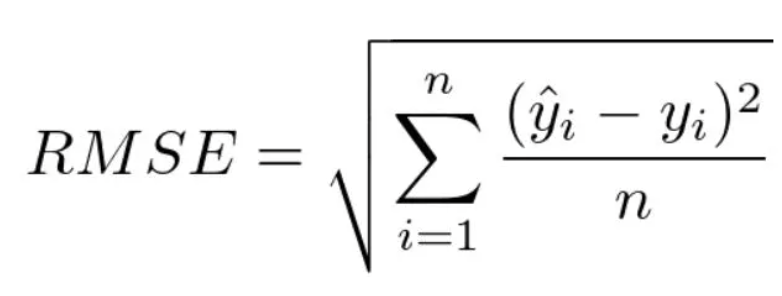

In [26]:
# Calculo utilizando la libreria
RMSE = mean_squared_error(Y_pron["Reales"], Y_pron["Pronostico"], squared = False)
print("La raíz cuadrada del error cuadrático medio RMSE es:", RMSE)

La raíz cuadrada del error cuadrático medio RMSE es: 9.390098367020478


In [27]:
# Calculo manual
RMSE2 = np.sqrt(sum((Y_pron["Reales"] - Y_pron["Pronostico"])**2)/Y_pron.shape[0])
print("La raíz cuadrada del error cuadrático medio RMSE es:", RMSE2)

La raíz cuadrada del error cuadrático medio RMSE es: 9.39009836702048


Un **RMSE** de $9.4$ significa que, en promedio, las predicciones del modelo se desvían en $9.4$ unidades de la variable de respuesta en comparación con los valores de entrenamiento.

In [28]:
# Calculo utilizando la libreria
RMSE_Log = mean_squared_error(Y_pron["Reales"], Y_pron["Pronostico_log"], squared = False)
print("La raíz cuadrada del error cuadrático medio RMSE para la variable con logaritmo es:\n", RMSE_Log)

La raíz cuadrada del error cuadrático medio RMSE para la variable con logaritmo es:
 9.981187516504647


In [29]:
# Calculo manual
RMSE_Log2 = np.sqrt(sum((Y_pron["Reales"] - Y_pron["Pronostico_log"])**2)/Y_pron.shape[0])
print("La raíz cuadrada del error cuadrático medio RMSE para la variable con logaritmo es:\n", RMSE_Log2)

La raíz cuadrada del error cuadrático medio RMSE para la variable con logaritmo es:
 9.981187516504646


Un **RMSE** de $9.9$ significa que, en promedio, las predicciones del modelo se desvían en $9.9$ unidades de la variable de respuesta en comparación con los valores logarítmicos.

## **Coeficiente de Determinación (R^2)**

Es otra medida que podemos usar para evaluar un modelo, y está estrechamente relacionada con la **MSE**, pero tiene la ventaja de estar libre de escala, no importa si Los valores de salida son muy grandes o muy pequeños, el $R^2$ siempre estará entre $0$ y $1$.

Cuando $R^2$ es negativo, significa que el modelo es peor que predecir la media.

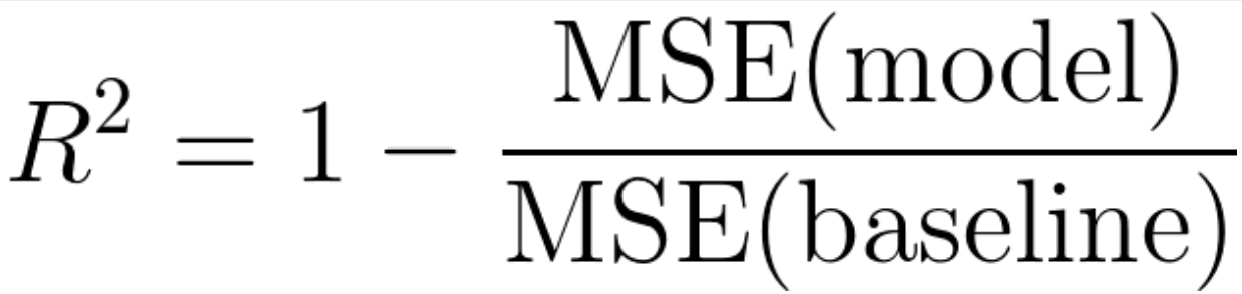

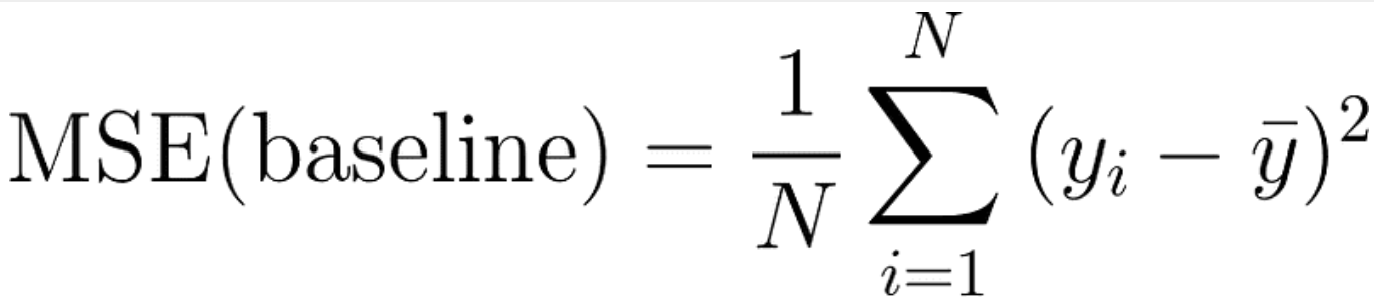

* $SS_{res}$ es la suma de los cuadrados de las diferencias entre las predicciones y los valores reales

* $SS_{tot}$ es la suma de los cuadrados de las diferencias entre los valores reales y la media.

In [30]:
# Calculo utilizando la libreria
R2 = r2_score(Y_pron["Reales"], Y_pron["Pronostico"])
print("El coeficiente de determinación R^2 es:", R2)

El coeficiente de determinación R^2 es: 0.15474114724902743


In [31]:
#Calculo Manual

ssres = sum((Y_pron["Reales"] - Y_pron["Pronostico"]) ** 2)
sstot = sum((Y_pron["Reales"] - Y_pron["Reales"].mean()) ** 2)
r2 = 1 - (ssres / sstot)
print("El coeficiente de determinación R^2 es:",r2)

El coeficiente de determinación R^2 es: 0.15474114724902766


Un valor de $R^2$ de $0.1547$ significa que solo el $15.47\%$ de la variación en la variable de respuesta se explica por la variable independiente en el modelo de regresión lineal simple. 

Esto indica que el modelo **no** es muy bueno para explicar las variaciones en la variable de respuesta.

In [32]:
# Calculo utilizando la libreria
R2_Log = r2_score(Y_pron["Reales"], Y_pron["Pronostico_log"])
print("El coeficiente de determinación R^2 para la variable con logaritmo es:", R2_Log)

El coeficiente de determinación R^2 para la variable con logaritmo es: 0.04497690537764765


In [33]:
#Calculo Manual

ssres = sum((Y_pron["Reales"] - Y_pron["Pronostico_log"]) ** 2)
sstot = sum((Y_pron["Reales"] - Y_pron["Reales"].mean()) ** 2)
r2 = 1 - (ssres / sstot)
print("El coeficiente de determinación R^2 para la variable con logaritmo es:",r2)

El coeficiente de determinación R^2 para la variable con logaritmo es: 0.04497690537764831


Un valor de R^2 de 0.049 significa que solo el 4.9% de la variación en la variable de respuesta logarítimica se explica por la variable independiente en el modelo de regresión lineal simple. Esto indica que el modelo no es muy bueno para explicar las variaciones en la variable de respuesta logarítimica.

## **Construcción de la gráfica de regresión lineal para el modelo**

A continuación se visualizará la data real, que son las columnas correspondientes al comparativo entre la variable `X = base_asesinatos_sinNA[["medIncome"]]` y la variable 
`Y = base_asesinatos_sinNA["murdPerPop"]`, a su vez la linea de tendencia dada por lo trabajado en el modelo de regresión lineal dada por `sklearn`.

<Figure size 800x600 with 0 Axes>

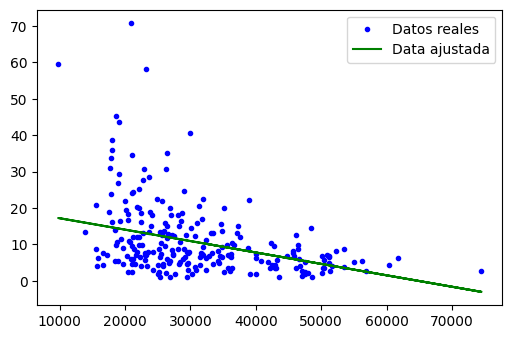

In [42]:
import matplotlib.pyplot as plt

# Predicciones o pronostico
Y_pron = pd.DataFrame((RegresionLineal.predict(X_test)), index=Y_test.index, columns=["Pronostico"])
Y_pron["Reales"] = Y_test
Y_pron["Pronostico_log"]=np.exp(RegresionLineal_log.predict(X_test))
Y_pron

# Gráfico del modelo
fig=plt.figure(figsize=(8,6),dpi=100)
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(X_test, Y_pron["Reales"], marker='.', color = "blue", label="Datos reales")
ax.plot(X_test, Y_pron["Pronostico"], linestyle='-', color = "green", label="Data ajustada")
ax.legend()
plt.show()